In [51]:
!pip install praw
!pip install nltk
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
import praw

user_agent = "kerem"
reddit = praw.Reddit(
    client_id="YO6Dy_4rO-6yMx8PXC0msw",
    client_secret="_Nf2mgAwSJP_bGmJ6NUdHGSCGAtaUQ",
    user_agent=user_agent
)

In [53]:
headlines = set()
for submission in reddit.subreddit('nba').hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

763


In [54]:
df = pd.DataFrame(headlines)
df.head()

,0
0,[StatMuse]James Harden tonight: 26 PTS 6 REB 8...
1,[Post Game Thread] The Denver Nuggets (26-13) ...
2,"[Highlight] Anthony Lamb, a two way player, hi..."
3,Can a player score with no minutes played?
4,[Highlight] Jalen Brunson throws Sims a perfec...


In [55]:
df.to_csv('konular.csv', header=False, encoding='utf-8', index=False)

In [56]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/keremaylanc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [57]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['konu'] = line
    results.append(pol_score)
    
pprint(results[:3], width=100)

[{'compound': 0.0,
  'konu': '[StatMuse]James Harden tonight: 26 PTS 6 REB 8 AST Only LeBron has more 25/5/5 games '
          'since 2000',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.4588,
  'konu': '[Post Game Thread] The Denver Nuggets (26-13) defeat the Cleveland Cavaliers (25-15), '
          "121-108 behind Jokic's 28/15/10 on Orthodox Christmas Eve",
  'neg': 0.136,
  'neu': 0.864,
  'pos': 0.0},
 {'compound': 0.0,
  'konu': '[Highlight] Anthony Lamb, a two way player, hits his 4th three-pointer of the first '
          "quarter, he's now 4/4",
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [58]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,konu
0,0.000,1.000,0.000,0.0000,[StatMuse]James Harden tonight: 26 PTS 6 REB 8...
1,0.136,0.864,0.000,-0.4588,[Post Game Thread] The Denver Nuggets (26-13) ...
2,0.000,1.000,0.000,0.0000,"[Highlight] Anthony Lamb, a two way player, hi..."
3,0.229,0.521,0.250,0.0516,Can a player score with no minutes played?
4,0.000,0.602,0.398,0.7650,[Highlight] Jalen Brunson throws Sims a perfec...


In [59]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,konu,label
0,0.000,1.000,0.000,0.0000,[StatMuse]James Harden tonight: 26 PTS 6 REB 8...,0
1,0.136,0.864,0.000,-0.4588,[Post Game Thread] The Denver Nuggets (26-13) ...,-1
2,0.000,1.000,0.000,0.0000,"[Highlight] Anthony Lamb, a two way player, hi...",0
3,0.229,0.521,0.250,0.0516,Can a player score with no minutes played?,0
4,0.000,0.602,0.398,0.7650,[Highlight] Jalen Brunson throws Sims a perfec...,1


In [60]:
df2 = df[['konu', 'label']]

In [61]:
df2.to_csv('Reddit_konular.csv', encoding='utf-8', index=False)

In [62]:
df.label.value_counts()

 0    348
 1    246
-1    169
Name: label, dtype: int64

In [63]:
df.label.value_counts(normalize=True) * 100

 0    45.609436
 1    32.241153
-1    22.149410
Name: label, dtype: float64

In [64]:
print("Olumlu açıklamalar:\n")
pprint(list(df[df['label'] == 1].konu)[:5], width=200)

print("Olumsuz açıklamlar:\n")
pprint(list(df[df['label'] == -1].konu)[:5], width=200)

Olumlu açıklamalar:

['[Highlight] Jalen Brunson throws Sims a perfect pass for the easy alley oop',
 'Is this the best the NBA has been in awhile?',
 "Who's the better overall shooter between Damian Lillard and Kyrie Irving, in your opinion?",
 'rank every player on your favorite team',
 '[Weiss] Marcus Smart was fined $35K by the NBA for his language toward an official as he was ejected in OKC.']
Olumsuz açıklamlar:

["[Post Game Thread] The Denver Nuggets (26-13) defeat the Cleveland Cavaliers (25-15), 121-108 behind Jokic's 28/15/10 on Orthodox Christmas Eve",
 '[Post Game Thread] The New Orleans Pelicans (24-14) defeat the Houston Rockets (10-28), 119-108.',
 'With 1:09 left in the 4th, the Bucks had a 99.9% chance of beating the Raptors. The Raptors managed to send the game into overtime.',
 '[Afseth] Christian Wood has averaged 18.9 points, 7.5 rebounds, and 2.9 blocks in 8 starts alongside Luka Doncic. The Mavericks are 7-1 in those games. Wood has as many games (3) with 4+ blo

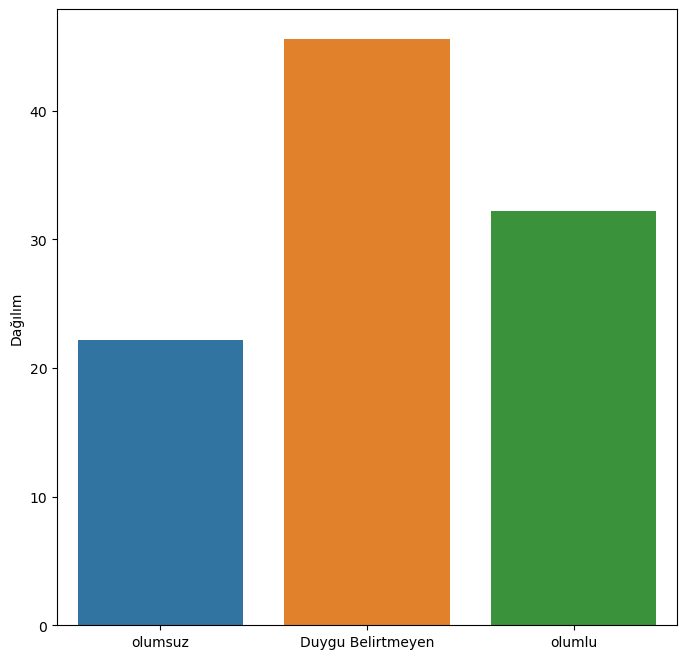

In [65]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['olumsuz', 'Duygu Belirtmeyen', 'olumlu'])
ax.set_ylabel("Dağılım")

plt.show()